# iLQR Parking Car Example

In [1]:
cd ..

/home/vjose/code/robotics-sandbox-py


In [3]:
import numpy as np
from matplotlib import pyplot as plt

from policies.ilqr import iLQR, iLQRConfig
from models.bicycle_model import BicycleModelWithInputIntegrators

## Define parking cost function and dynamics for the iLQR

In [4]:
class ParkingCostFunction(object):
    def __init__(self, goal):
        self.goal = goal
        
        base_cost = np.diag(np.array([1.0, 1.0, 10.0, 1.0, 100.0, 100.0]))
        self.Q = 0.00001 * base_cost
        self.Q_N = 100 * base_cost
        self.R = 0.1 * np.eye(2)

    def get_stage_cost(self, x, u):
        return (x - self.goal).T @ self.Q @ (x - self.goal) + u.T @ self.R @ u

    def get_terminal_cost(self, x):
        return (x - self.goal).T @ self.Q_N @ (x - self.goal)


goal = np.array([0.5, 0.0, np.pi / 2.0, 0.0, 0.0, 0.0])
dynamics = BicycleModelWithInputIntegrators()
cost_function = ParkingCostFunction(goal)

config = iLQRConfig(horizon=200, iters = 20)
policy = iLQR(config, dynamics, cost_function)

In [22]:
# Define a callback function to extract the intermediate solutions of the optimization problem
x_solutions = []
def callback_fn(iter, x, u):
    x_solutions.append(x)

initial_state = np.array([-0.0, -20.0, 0.0, 0.0, 0.0, 0.0])
x_final_solution, _ = policy.solve(initial_state, callback=callback_fn)

iter:  0  cost:  42493.254
iter:  1  cost:  42468.25
iter:  2  cost:  42213.45
iter:  3  cost:  41237.18
iter:  4  cost:  36007.883
iter:  5  cost:  19523.98
iter:  6  cost:  11211.696
iter:  7  cost:  6260.535
iter:  8  cost:  2049.6575
iter:  9  cost:  632.74976
iter:  10  cost:  383.45004
iter:  11  cost:  124.26758
iter:  12  cost:  36.207943
iter:  13  cost:  24.449677
iter:  14  cost:  13.556225
iter:  15  cost:  9.015301
iter:  16  cost:  8.698076
iter:  17  cost:  8.102919
iter:  18  cost:  7.9447947
iter:  19  cost:  7.7853737


## Visualize the iterations of the optimization problem

<IPython.core.display.Javascript object>


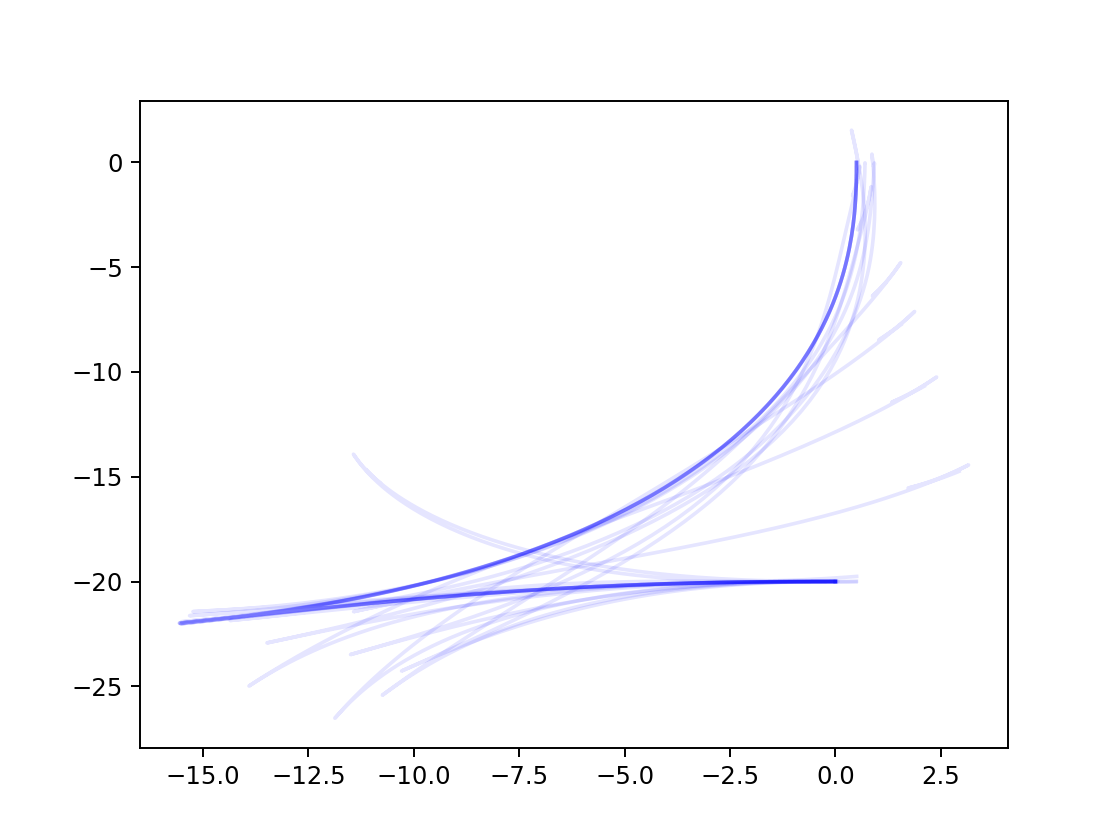

In [26]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1)
for x_solution in x_solutions:
    ax.plot(x_solution[:, 0], x_solution[:, 1], alpha=0.1, color="b")
plt.show()

In [ ]:
=